
# Table of Contents  
1. [About Dataset](#1)
2. [Import Libraries](#2)     
3. [Read Dataset](#3)
   1. [Check Columns and Rows](#10)
   2. [Check the Dataset](#11)
   3. [Check Missing Data](#12)
5. [Data Exploration](#4)
   1. [Class](#13)
   2. [Amount and Time](#14)
   3. [Feature Correlation](#15)
6. [Feature Scaling](#5)
7. [Predictive Models (Without Under-/Over-sampling)](#6)
   1. [Train Test Split](#16)
   2. [Random Forest](#17)
   3. [Logistic Regression](#18)
   4. [K-Nearest Neighbors](#19)
   5. [Support Vector Machine](#20)
   6. [Neural Networks Using TensorFlow](#21)
   7. [Performance Comparison](#22)
8. [Predictive Models (With Random Under-sampling)](#7)
   1. [Resampling](#23)
   2. [Random Forest](#24)
   3. [Logistic Regression](#25)
   4. [K-Nearest Neighbors](#26)
   5. [Support Vector Machine](#27)
   6. [Neural Networks Using TensorFlow](#28)
   7. [Performance Comparison](#29)
10. [Predictive Models (With SMOTE - Synthetic Minority Over-sampling Technique)](#8)
    1. [Random Forest](#30)
    2. [Logistic Regression](#31)
    3. [K-Nearest Neighbors](#32)
    4. [Support Vector Machine](#33)
    5. [Neural Networks Using TensorFlow](#34)
    6. [Performance Comparison](#35)
12. [Summary](#9)     

<a id="1"></a> 
# 1. About Dataset

**Data Source**: Machine Learning Group - ULB, Andrea. (2017). Credit Card Fraud Detection, Version 3. Available at: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

**Context**: It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**: The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where there were 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, there are not provided the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<a id="2"></a> 
# 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="3"></a> 
# 3. Read Dataset

In [2]:
df = pd.read_csv('creditcard.csv')

<a id="10"></a> 
## 3.1 Check Columns and Rows

In [3]:
# Check the columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
# Check the number of rows and columns
print("Number of Rows: {:,} \nNumber of Columns: {}".format(df.shape[0], df.shape[1]))

Number of Rows: 284,807 
Number of Columns: 31


<a id="11"></a> 
## 3.2 Check the Dataset

In [5]:
# Check the first few rows of the dateset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Check the descriptive statistics 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<a id="12"></a> 
## 3.3 Check Missing Data

In [8]:
# Check if there are missing values, there are no missing data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<a id="4"></a>
# 4. Data Exploration 

<a id="13"></a>
## 4.1 Class

As indicated below, the target **Class** in the dataset is heavily skewed.

In [9]:
# Check the target 'Class'
print('Genuine:', round(df['Class'].value_counts()[0]/len(df)*100, 2), '% of the transactions')
print('Fraudulent:', round(df['Class'].value_counts()[1]/len(df)*100, 2), '% of the transactions')

Genuine: 99.83 % of the transactions
Fraudulent: 0.17 % of the transactions


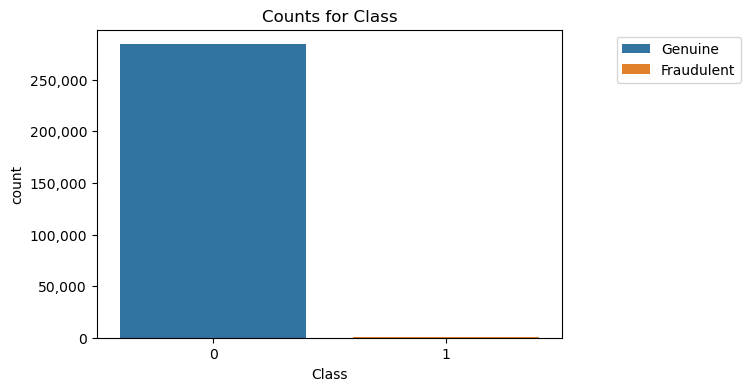

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.countplot(x='Class', data=df, hue='Class', dodge=False)
plt.title('Counts for Class')
plt.legend(labels = ['Genuine','Fraudulent'], bbox_to_anchor=(1.4, 1))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

<a id="14"></a>
## 4.2 Amount and Time

As shown in the graph below, the majority of transactions consist of small amounts. However, it's noteworthy that the distribution exhibits significant variability, with the maximum transaction amount exceeding 25,000.

Text(0.5, 1.0, 'Distribution of Time')

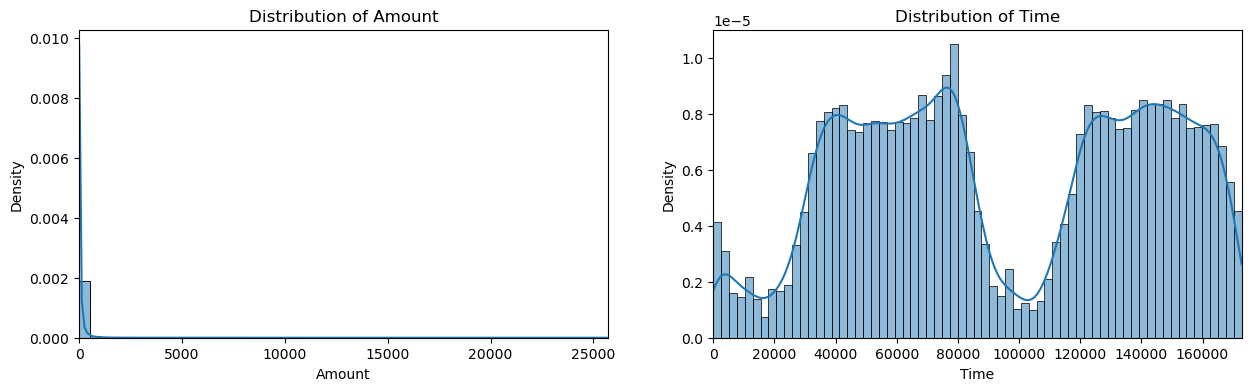

In [11]:
# Check the feature 'Amount' and 'Time'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax1 = sns.histplot(ax=ax1, x='Amount', data=df, stat='density', bins=50, kde=True)
ax1.set_xlim(min(df['Amount']), max(df['Amount']))
ax1.set_title('Distribution of Amount', fontsize=12)

ax2 = sns.histplot(ax=ax2, x='Time', data=df, stat='density', kde=True)
ax2.set_xlim(min(df['Time']), max(df['Time'])) 
ax2.set_title('Distribution of Time', fontsize=12)

<a id="15"></a>
## 4.3 Feature Correlation

<Axes: >

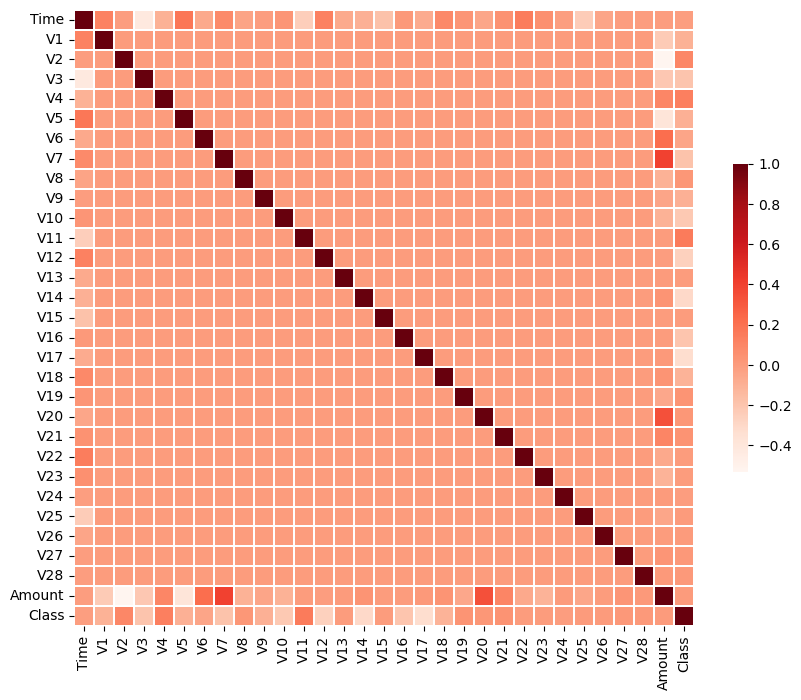

In [12]:
fig = plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, cmap='Reds', linewidth=0.1, cbar_kws={"shrink": 0.5})

While features **V1** to **V28** demonstrate negligible correlation amongst themselves, it's noteworthy that there are some correlations when considering these features alongside **Time**, **Amount**, and **Class**:

- **Time** has a negative correlation with **V3**
- **Amount** has a positive correlation with **V7** and **V20**, while demonstrating a negative correlation with **V2** and **V5**
- **Class** demonstrates a subtle negative correlation with **V17** and **V14**

<a id="5"></a>
# 5. Feature Scaling

Given the prior PCA transformation of the other columns, it is imperative to scale the features **Time** and **Amount** as well. RobustScaler is implemented for its ability to scale features using statistics that are robust to outliers. 

In [13]:
# Scale the columns 'Time' and 'Amount'
rs = RobustScaler()

df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount', 'Time'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


<a id="6"></a>
# 6. Predictive Models (Without Under-/Over-sampling)

<a id="16"></a>
## 6.1 Train Test Split 

Given the highly imbalanced distribution of the target in the dataset, a stratified split is applied to maintain the relative class frequencies of the target in both the training and test sets.

In [14]:
# Define the predictors and target 
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print('No. of Transactions in Training Set: {:,}'.format(len(X_train)))
print('No. of Transactions in Test Set: {:,}'.format(len(X_test)))
print('Total No. of Transactions: {:,}'.format(len(X_train) + len(X_test)))

No. of Transactions in Training Set: 199,364
No. of Transactions in Test Set: 85,443
Total No. of Transactions: 284,807


<a id="17"></a>
## 6.2 Random Forest 

In [16]:
# Create an instance of the model
rf = RandomForestClassifier(random_state=42)

In [17]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.84057971 0.73913043 0.7826087  0.79710145 0.79411765]
Average Cross Validation Recall Score: 0.7907075873827791


The Random Forest classifier is estimated to achieve an average recall score of around 79.1%, indicating its expected performance in correctly identifying 79.1% of fraudulent transactions.

In [18]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 10, 12, 14]
}

rf_grid = GridSearchCV(rf, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(rf_grid.best_params_))
print('Best Recall Score: {}'.format(rf_grid.best_score_))

Best Parameters: {'max_depth': 12, 'n_estimators': 200}
Best Recall Score: 0.7907075873827791


The average cross-validated recall score of the best estimator with the best parameter combination is around 79.1%.

In [19]:
# Make predictions on the test set with the best found parameters
rf_pred = rf_grid.predict(X_test)

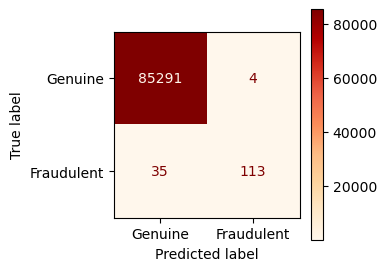

In [20]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [21]:
# Compute the main metrics
rf_recall = recall_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

rf_scores = pd.DataFrame(data=[(rf_recall, rf_precision, rf_f1, rf_accuracy)], 
                         columns=['Recall','Precision','F1 Score', 'Accuracy'],
                         index=['Random Forest'])

rf_scores.head()

,Recall,Precision,F1 Score,Accuracy
Random Forest,0.763514,0.965812,0.85283,0.999544


Random Forest demonstrates strong performance with high precision, indicating that when the model predicts a fraudulent transaction, it is highly likely to be correct. The model achieves a recall score of around 76.4%, suggesting its effectiveness in capturing a significant portion of the actual fraudulent transactions. The F1 score of around 85.3% reflects a balanced performance between precision and recall.

<a id="18"></a>
## 6.3 Logistic Regression

In [22]:
# Create an instance of the model
lr = LogisticRegression(max_iter=200)

In [23]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(lr, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.72463768 0.60869565 0.65217391 0.66666667 0.57352941]
Average Cross Validation Recall Score: 0.6451406649616368


In [24]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

lr_grid = GridSearchCV(lr, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(lr_grid.best_params_))
print('Best Recall Score: {}'.format(lr_grid.best_score_))

Best Parameters: {'C': 10}
Best Recall Score: 0.6480392156862745


In [25]:
# Predict the target with the best found parameters
lr_pred = lr_grid.predict(X_test)

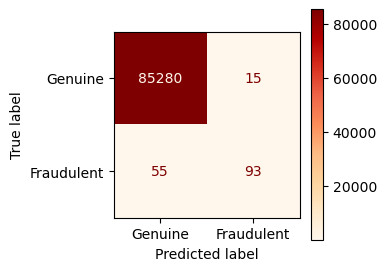

In [26]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [27]:
# Compute the main metrics
lr_recall = recall_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

lr_scores = pd.DataFrame(data=[(lr_recall, lr_precision, lr_f1, lr_accuracy)], 
                         columns=['Recall','Precision','F1 Score', 'Accuracy'],
                         index=['Logistic Regression'])

lr_scores.head()

,Recall,Precision,F1 Score,Accuracy
Logistic Regression,0.628378,0.861111,0.726562,0.999181


Logistic Regression performs reasonably well, boasting a precision of around 86.1%, indicative of a relatively low rate of false positives - predicting genuine transactions as fraudulent. However, a lower recall at around 62.8% suggests that the model may miss a significant number of fraudulent transactions.

<a id="19"></a>
## 6.4 K-Nearest Neighbors

In [28]:
# Create an instance of the model
knn = KNeighborsClassifier()

In [29]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(knn, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.82608696 0.72463768 0.75362319 0.76811594 0.75      ]
Average Cross Validation Recall Score: 0.7644927536231884


In [30]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'n_neighbors': [1, 10, 20, 30, 40]
}

knn_grid = GridSearchCV(knn, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(knn_grid.best_params_))
print('Best Recall Score: {}'.format(knn_grid.best_score_))

Best parameters: {'n_neighbors': 1}
Best score: 0.7904944586530265


In [31]:
# Make predictions on the test set with the best found parameters
knn_pred = knn_grid.predict(X_test)

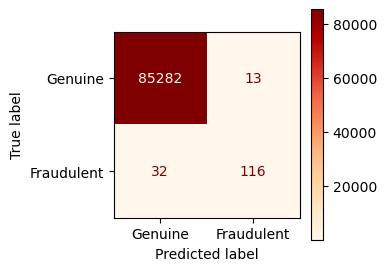

In [32]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [33]:
# Compute the main metrics
knn_recall = recall_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

knn_scores = pd.DataFrame(data=[(knn_recall, knn_precision, knn_f1, knn_accuracy)], 
                          columns=['Recall','Precision','F1 Score', 'Accuracy'],
                          index=['KNN'])

knn_scores.head()

,Recall,Precision,F1 Score,Accuracy
KNN,0.783784,0.899225,0.837545,0.999473


A high recall of around 78.4% indicates the K-Nearest Neighbors (KNN) model's ability to effectively capture positive instances. The model has a relatively high precision at around 89.9%, implying a low rate of false positives. The F1 score of 83.8% considers both precision and recall, indicating the model's overall effectiveness in capturing actual fraudulent transactions while maintaining a low rate of misclassifying genuine transactions as fraudulent.

<a id="20"></a>
## 6.5 Support Vector Machine

In [34]:
# Create an instance of the model
svm = SVC()

In [35]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(svm, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.73913043 0.71014493 0.71014493 0.75362319 0.67647059]
Average Cross Validation Recall Score: 0.7179028132992327


In [36]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_grid = GridSearchCV(svm, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(svm_grid.best_params_))
print('Best Recall Score: {}'.format(svm_grid.best_score_))

Best Parameters: {'C': 1, 'gamma': 0.001}
Best Recall Score: 0.8109548167092925


In [37]:
# Make predictions on the test set with the best found parameters
svm_pred = svm_grid.predict(X_test)

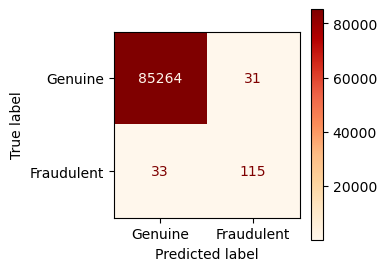

In [38]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [39]:
# Compute the main metrics
svm_recall = recall_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

svm_scores = pd.DataFrame(data=[(svm_recall, svm_precision, svm_f1, svm_accuracy)], 
                          columns=['Recall','Precision','F1 Score', 'Accuracy'],
                          index=['SVM'])

svm_scores.head()

,Recall,Precision,F1 Score,Accuracy
SVM,0.777027,0.787671,0.782313,0.999251


The recall of 77.7% indicates that the Support Vector Machine (SVM) is able to correctly identify 77.7% of the actual positive instances. The precision of 78.7% reflects a relatively balanced trade-off between false positives and false negatives. The SVM model demonstrates a balanced performance with reasonably high recall, precision, and F1 score. 

<a id="21"></a>
## 6.6 Neural Networks Using TensorFlow

In [43]:
# Set up the layers and compile the model
tf_model = Sequential()

tf_model.add(Dense(30, activation='relu'))
tf_model.add(Dropout(0.2))

tf_model.add(Dense(20, activation='relu'))
tf_model.add(Dropout(0.2))

tf_model.add(Dense(10, activation='relu'))
tf_model.add(Dropout(0.2))

tf_model.add(Dense(5, activation='relu'))
tf_model.add(Dropout(0.2))

tf_model.add(Dense(1, activation='sigmoid'))

tf_model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
# Fit the neural network model to the training set
tf_model.fit(x=X_train, y=y_train, epochs=35, batch_size=250, validation_split=0.2)

Epoch 1/35
638/638 [==============================] - 2s 2ms/step - loss: 0.0812 - val_loss: 0.0063
Epoch 2/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0315 - val_loss: 0.0049
Epoch 3/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0244 - val_loss: 0.0052
Epoch 4/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0203 - val_loss: 0.0048
Epoch 5/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0162 - val_loss: 0.0047
Epoch 6/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0136 - val_loss: 0.0048
Epoch 7/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0116 - val_loss: 0.0047
Epoch 8/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0096 - val_loss: 0.0043
Epoch 9/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0078 - val_loss: 0.0046
Epoch 10/35
638/638 [==============================] - 1s 2ms/step - loss: 0.0068 - val_loss: 0.0041

Text(0, 0.5, 'Loss')

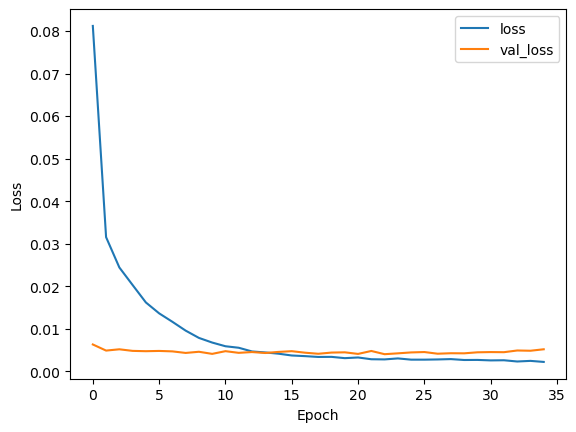

In [45]:
# Review training and validation loss
losses = pd.DataFrame(tf_model.history.history) 
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')

While the training loss curve initially descends, indicating improvements as the model trains, it reaches a point of stagnation. Meanwhile, the validation loss curve, slightly exceeding the training loss, suggests a minor overfitting tendency to the training data.

In [46]:
# Make predictions on the test set with the trained model
tf_pred = (tf_model.predict(X_test) > 0.5).astype("int32")

2671/2671 [==============================] - 3s 988us/step


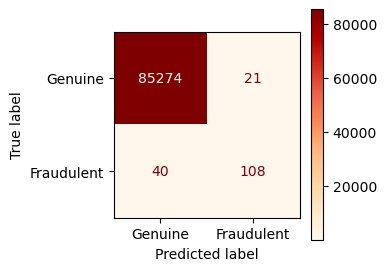

In [47]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, tf_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [48]:
# Compute the main metrics
tf_recall = recall_score(y_test, tf_pred)
tf_precision = precision_score(y_test, tf_pred)
tf_f1 = f1_score(y_test, tf_pred)
tf_accuracy = accuracy_score(y_test, tf_pred)

tf_scores = pd.DataFrame(data=[(tf_recall, tf_precision, tf_f1, tf_accuracy)], 
                         columns=['Recall', 'Precision','F1 Score', 'Accuracy'],
                         index=['Neural Networks Using TensorFlow'])

tf_scores.head()

,Recall,Precision,F1 Score,Accuracy
Neural Networks Using TensorFlow,0.72973,0.837209,0.779783,0.999286


The recall of around 73.0% suggests that the neural network is able to identify a substantial portion of the actual fraudulent transactions. The precision of 83.7% indicates that when the neural network predicts a fraudulent transaction, it is correct 83.7% of the time. Overall, the neural network demonstrates a good balance between precision and recall, which is essential in imbalanced datasets.

<a id="22"></a>
## 6.7 Performance Comparison

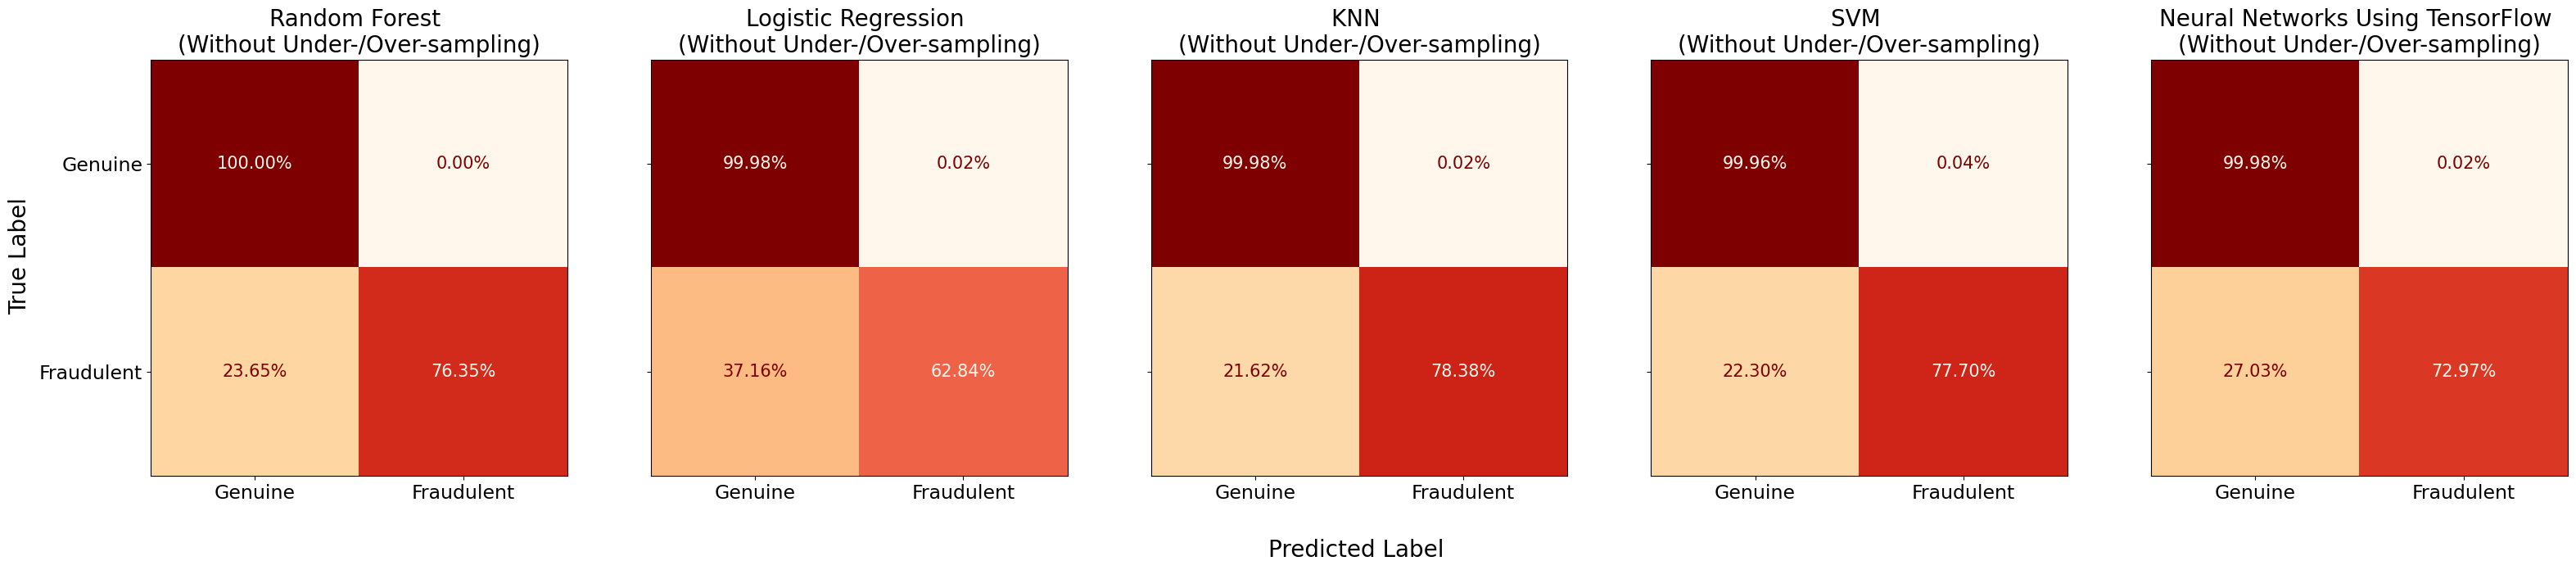

In [150]:
# Compare the confusion matrix
fig, axes = plt.subplots(1, 5, figsize=(32, 6), sharex=True, sharey=True)

predictions_list = [rf_pred, lr_pred, knn_pred, svm_pred, tf_pred]
models = ['Random Forest', 'Logistic Regression', 'KNN', 'SVM', 'Neural Networks Using TensorFlow']
techniques = ['Without Under-/Over-sampling'] * 5

axes = axes.flatten()

for i, predictions in enumerate(predictions_list):
    ax = axes[i]  
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax, display_labels=display_labels, cmap='OrRd', colorbar=False, normalize='true', values_format='.2%', text_kw={"fontsize":15})
    
    title = f'{models[i]} \n({techniques[i]})'
    cm_display.ax_.set_title(f'{title}', fontsize=20)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].set_xticklabels(display_labels, fontsize=17)
    axes[i].set_yticklabels(display_labels, fontsize=17)
    
fig.text(0.52, -0.1, 'Predicted Label', ha='center', va='center', fontsize=20)
fig.text(0.01, 0.5, 'True Label', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout() 
plt.show() 


In [146]:
# Compare the metrics
prediction = pd.concat([rf_scores, lr_scores, knn_scores, svm_scores, tf_scores], ignore_index=False)

iterables = [['Without Under-/Over-sampling'], list(prediction.index)]
index = pd.MultiIndex.from_product(iterables, names=['Technique', 'Model'])
prediction = pd.DataFrame(prediction.to_numpy(), index=index, columns=list(prediction.columns.values))

prediction.head()

Recall  \
Technique                    Model                                        
Without Under-/Over-sampling Random Forest                     0.763514   
                             Logistic Regression               0.628378   
                             KNN                               0.783784   
                             SVM                               0.777027   
                             Neural Networks Using TensorFlow  0.729730   

                                                               Precision  \
Technique                    Model                                         
Without Under-/Over-sampling Random Forest                      0.965812   
                             Logistic Regression                0.861111   
                             KNN                                0.899225   
                             SVM                                0.787671   
                             Neural Networks Using TensorFlow   0.837209   

                                                               F1 Score  \
Technique                    Model                                        
Without Under-/Over-sampling Random Forest                     0.852830   
                             Logistic Regression               0.726562   
                             KNN                               0.837545   
                             SVM                               0.782313   
                             Neural Networks Using TensorFlow  0.779783   

                                                               Accuracy  
Technique                    Model                                       
Without Under-/Over-sampling Random Forest                     0.999544  
                             Logistic Regression               0.999181  
                             KNN                               0.999473  
                             SVM                               0.999251  
                             Neural Networks Using TensorFlow  0.999286

Before implementing under-sampling or over-sampling, it is evident that:
- **KNN** achieved the highest recall (78.4%), indicating its effectiveness in capturing positive instances (correctly classifying fraudulent transactions).
- **Random Forest** achieved the highest precision (96.6%), indicating a very low rate of false positives (incorrectly classifying fraudulent transactions).
- **Random Forest** has the highest F1 score (85.3%), reflecting a balanced performance between precision and recall.
- **All models** demonstrate high accuracy, indicating correct overall predictions. However, accuracy alone may not be the most informative metric in highly imbalanced datasets. This is due to the fact that employing a simplistic strategy, such as blind guessing by favouring the majority class (genuine transactions), would still yield an accuracy score of around 99.8% in this classification task.

<a id="7"></a>
# 7. Predictive Models (With Random Under-sampling)

<a id="23"></a>
## 7.1 Resampling

In [51]:
# Define under-sampling strategy and resample the dataset
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print('No. of Genuine Transactions:', y_train_under.value_counts()[0])
print('No. of Fraudulent Transactions:', y_train_under.value_counts()[1])
print('Total No. of Transactions:', len(y_train_under))

No. of Genuine Transactions: 344
No. of Fraudulent Transactions: 344
Total No. of Transactions: 688


<a id="24"></a>
## 7.2 Random Forest

In [52]:
# Create an instance of the model
rf = RandomForestClassifier(random_state=42)

In [53]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(rf, X_train_under, y_train_under, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.94202899 0.88405797 0.89855072 0.92647059 0.88405797]
Average Cross Validation Recall Score: 0.9070332480818415


In [54]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [6, 10, 12, 14, 16, 18]
}

rf_under_grid = GridSearchCV(rf, param_grid, scoring='recall', cv=kf).fit(X_train_under, y_train_under)

print('Best Parameters: {}'.format(rf_under_grid.best_params_))
print('Best Recall Score: {}'.format(rf_under_grid.best_score_))

Best Parameters: {'max_depth': 12, 'n_estimators': 200}
Best Recall Score: 0.9128303495311169


In [55]:
# Make predictions on the test set with the best found parameters
rf_under_pred = rf_under_grid.predict(X_test)

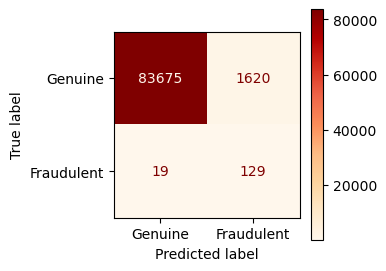

In [56]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, rf_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [57]:
# Compute the main metrics
rf_under_recall = recall_score(y_test, rf_under_pred)
rf_under_precision = precision_score(y_test, rf_under_pred)
rf_under_f1 = f1_score(y_test, rf_under_pred)
rf_under_accuracy = accuracy_score(y_test, rf_under_pred)

rf_under_scores = pd.DataFrame(data=[(rf_under_recall, rf_under_precision, rf_under_f1, rf_under_accuracy)], 
                               columns=['Recall','Precision','F1 Score', 'Accuracy'],
                               index=['Random Forest'])

rf_under_scores.head()

,Recall,Precision,F1 Score,Accuracy
Random Forest,0.871622,0.073756,0.136004,0.980818


The recall of 87.2% indicates there is an improvement compared to the initial results without under-sampling, suggesting that the model is better at capturing positive cases. The precision of 7.4% is relatively low, indicating that when the Random Forest predicts a fraudulent transaction, it is correct only about 7.4% of the time. The decrease in precision is a common trade-off in imbalanced datasets after under-sampling, as the reduction in the majority class may lead to more misclassification of genuine transactions.

<a id="25"></a>
## 7.3 Logistic Regression

In [58]:
# Create an instance of the model
lr = LogisticRegression(max_iter=400)

In [59]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(lr, X_train_under, y_train_under, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.94202899 0.89855072 0.94202899 0.92647059 0.89855072]
Average Cross Validation Recall Score: 0.9215260017050297


In [60]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

lr_under_grid = GridSearchCV(lr, param_grid, scoring='recall', cv=kf).fit(X_train_under, y_train_under)

print('Best Parameters: {}'.format(lr_under_grid.best_params_))
print('Best Recall Score: {}'.format(lr_under_grid.best_score_))

Best Parameters: {'C': 10}
Best Recall Score: 0.9273657289002557


In [61]:
# Make predictions on the test set with the best found parameters
lr_under_pred = lr_under_grid.predict(X_test)

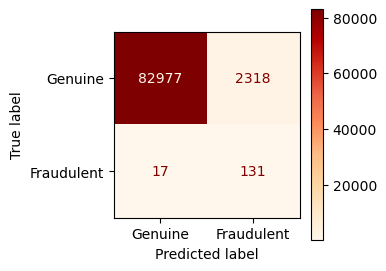

In [62]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, lr_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [63]:
# Compute the main metrics
lr_under_recall = recall_score(y_test, lr_under_pred)
lr_under_precision = precision_score(y_test, lr_under_pred)
lr_under_f1 = f1_score(y_test, lr_under_pred)
lr_under_accuracy = accuracy_score(y_test, lr_under_pred)

lr_under_scores = pd.DataFrame(data=[(lr_under_recall, lr_under_precision, lr_under_f1, lr_under_accuracy)], 
                               columns=['Recall','Precision','F1 Score', 'Accuracy'],
                               index=['Logistic Regression'])

lr_under_scores.head()

,Recall,Precision,F1 Score,Accuracy
Logistic Regression,0.885135,0.053491,0.100886,0.972672


Similar to the Random Forest model, the Logistic Regression model also demonstrates an improvement in recall, accompanied with a relatively low precision of approximately 5.3%. The reduction in precision is a common trade-off observed in imbalanced datasets following under-sampling. The F1 score, standing at 10.1%, reflects the trade-off between precision and recall. This decline in the F1 score is expected due to the compromise between precision and recall.

<a id="26"></a>
## 7.4 K-Nearest Neighbors

In [64]:
# Create an instance of the model
knn = KNeighborsClassifier()

In [65]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(knn, X_train_under, y_train_under, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.91304348 0.88405797 0.88405797 0.89705882 0.84057971]
Average Cross Validation Recall Score: 0.8837595907928388


In [66]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'n_neighbors': [1, 10, 20, 30, 40]
}

knn_under_grid = GridSearchCV(knn, param_grid, scoring='recall',cv=kf).fit(X_train_under, y_train_under)

print('Best Parameters: {}'.format(knn_under_grid.best_params_))
print('Best Recall Score: {}'.format(knn_under_grid.best_score_))

Best Parameters: {'n_neighbors': 1}
Best Recall Score: 0.915771526001705


In [67]:
# Make predictions on the test set with the best found parameters
knn_under_pred = knn_under_grid.predict(X_test)

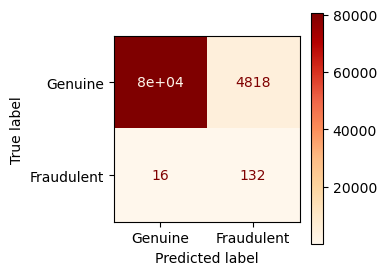

In [68]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, knn_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [69]:
# Compute the main metrics
knn_under_recall = recall_score(y_test, knn_under_pred)
knn_under_precision = precision_score(y_test, knn_under_pred)
knn_under_f1 = f1_score(y_test, knn_under_pred)
knn_under_accuracy = accuracy_score(y_test, knn_under_pred)

knn_under_scores = pd.DataFrame(data=[(knn_under_recall, knn_under_precision, knn_under_f1, knn_under_accuracy)], 
                                columns=['Recall','Precision','F1 Score', 'Accuracy'],
                                index=['KNN'])

knn_under_scores.head()

,Recall,Precision,F1 Score,Accuracy
KNN,0.891892,0.026667,0.051785,0.943424


There is a significant improvement in recall compared to the initial results of the KNN model without under-sampling, suggesting enhanced sensitivity to positive cases. As observed in other models, under-sampling led to a decrease in precision, standing at around 2.7%.

<a id="27"></a>
## 7.5 Support Vector Machine

In [70]:
# Create an instance of the model
svm = SVC()

In [71]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(svm, X_train_under, y_train_under, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.94202899 0.86956522 0.89855072 0.89705882 0.84057971]
Average Cross Validation Recall Score: 0.8895566922421143


In [72]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_under_grid = GridSearchCV(svm, param_grid, scoring='recall', cv=kf).fit(X_train_under, y_train_under)

print('Best Parameters: {}'.format(svm_under_grid.best_params_))
print('Best Recall Score: {}'.format(svm_under_grid.best_score_))

Best parameters: {'C': 0.1, 'gamma': 0.1}
Best score: 0.967988064791134


In [73]:
# Make predictions on the test set with the best found parameters
svm_under_pred = svm_under_grid.predict(X_test)

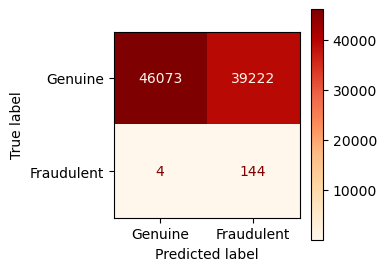

In [74]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, svm_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [75]:
# Compute the main metrics
svm_under_recall = recall_score(y_test, svm_under_pred)
svm_under_precision = precision_score(y_test, svm_under_pred)
svm_under_f1 = f1_score(y_test, svm_under_pred)
svm_under_accuracy = accuracy_score(y_test, svm_under_pred)

svm_under_scores = pd.DataFrame(data=[(svm_under_recall, svm_under_precision, svm_under_f1, svm_under_accuracy)], 
                                columns=['Recall','Precision','F1 Score', 'Accuracy'],
                                index=['SVM'])
svm_under_scores.head()

,Recall,Precision,F1 Score,Accuracy
SVM,0.972973,0.003658,0.007289,0.54091


The recall of 97.3% is exceptionally high, indicating that the SVM model is extremely effective in correctly identifying 97.3% of the actual fraudulent transactions after under-sampling. This represents a significant improvement compared to the initial results without under-sampling. On the other hand, the precision of around 0.4% is very low, suggesting that when the SVM model predicts a fraudulent transaction, it is correct only about 0.4% of the time. The F1 score of 0.7% reflects the substantial trade-off between precision and recall, highlighting the challenges of achieving balance in the presence of imbalanced data.

<a id="28"></a>
## 7.6 Neural Networks Using TensorFlow

In [76]:
# Set up the layers and compile the model
tf_model_under = Sequential()

tf_model_under.add(Dense(30, activation='relu'))
tf_model_under.add(Dropout(0.1))

tf_model_under.add(Dense(15, activation='relu'))
tf_model_under.add(Dropout(0.1))

tf_model_under.add(Dense(1, activation='sigmoid'))

tf_model_under.compile(loss='binary_crossentropy', optimizer='adam')

In [77]:
# Fit the neural network model to the training set
tf_model_under.fit(x=X_train_under, y=y_train_under, epochs=30, validation_split=0.2)

Epoch 1/30
18/18 [==============================] - 1s 9ms/step - loss: 1.5797 - val_loss: 1.2147
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6619 - val_loss: 0.5525
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5330 - val_loss: 0.4099
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4579 - val_loss: 0.3366
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4065 - val_loss: 0.2842
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.3207 - val_loss: 0.2782
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.2977 - val_loss: 0.2861
Epoch 8/30
18/18 [==============================] - 0s 3ms/step - loss: 0.2709 - val_loss: 0.2980
Epoch 9/30
18/18 [==============================] - 0s 3ms/step - loss: 0.2559 - val_loss: 0.2964
Epoch 10/30
18/18 [==============================] - 0s 3ms/step - loss: 0.2370 - val_loss: 0.2900
Epoch 11/30
18/18 [

Text(0, 0.5, 'Loss')

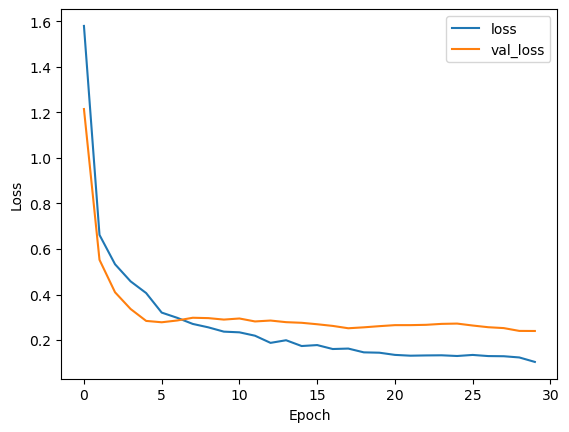

In [78]:
# Review training and validation loss
losses = pd.DataFrame(tf_model_under.history.history) 
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [79]:
# Make predictions on the test set with the trained model
tf_under_pred = (tf_model_under.predict(X_test) > 0.5).astype("int32")

2671/2671 [==============================] - 2s 849us/step


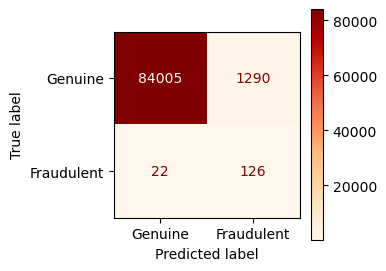

In [80]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, tf_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [81]:
# Compute the main metrics
tf_under_recall = recall_score(y_test, tf_under_pred)
tf_under_precision = precision_score(y_test, tf_under_pred)
tf_under_f1 = f1_score(y_test, tf_under_pred)
tf_under_accuracy = accuracy_score(y_test, tf_under_pred)

tf_under_scores = pd.DataFrame(data=[(tf_under_recall, tf_under_precision, tf_under_f1, tf_under_accuracy)], 
                               columns=['Recall', 'Precision','F1 Score', 'Accuracy'],
                               index=['Neural Networks Using TensorFlow'])

tf_under_scores.head()

,Recall,Precision,F1 Score,Accuracy
Neural Networks Using TensorFlow,0.851351,0.088983,0.161125,0.984645


The neural network shows a significant improvement in recall after under-sampling, standing at 85.1%, which signifies its effectiveness in identifying positive instances. Similar to other models, the reduction in precision is a common consequence of under-sampling. The decrease in the F1 score aligns with the compromise between these two metrics.

<a id="29"></a>
## 7.7 Performance Comparison 

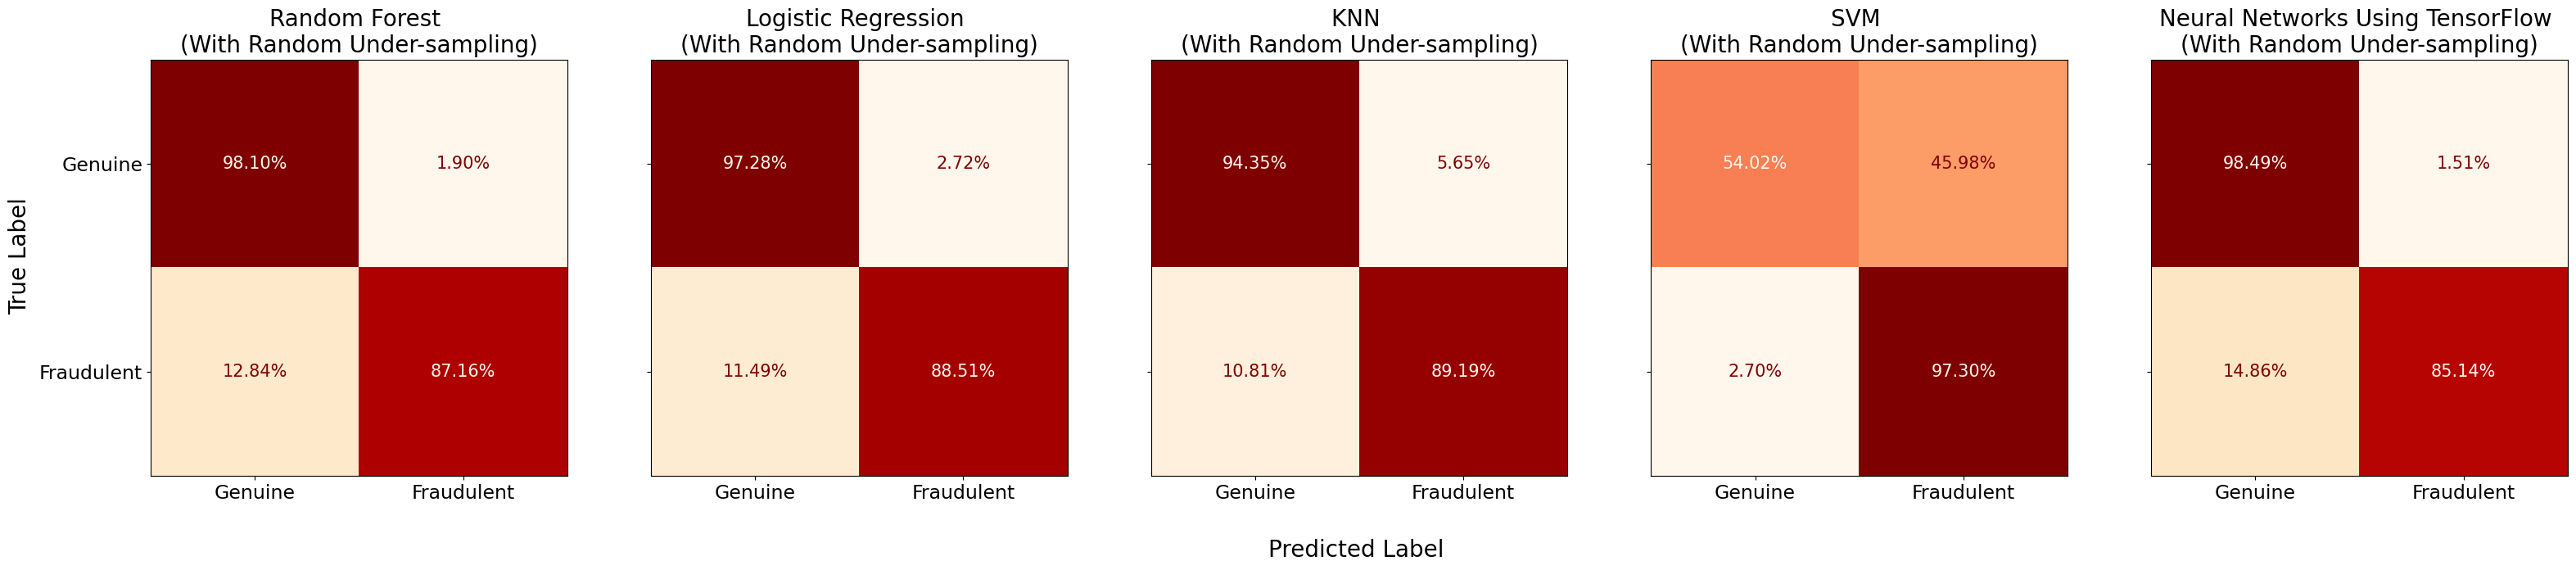

In [151]:
# Compare the confusion matrix
fig, axes = plt.subplots(1, 5, figsize=(32, 6), sharex=True, sharey=True)

under_predictions_list = [rf_under_pred, lr_under_pred, knn_under_pred, svm_under_pred, tf_under_pred]
models = ['Random Forest', 'Logistic Regression', 'KNN', 'SVM', 'Neural Networks Using TensorFlow']
techniques = ['With Random Under-sampling'] * 5

axes = axes.flatten()

for i, predictions in enumerate(under_predictions_list):
    ax = axes[i]  
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax, display_labels=display_labels, cmap='OrRd', colorbar=False, normalize='true', values_format='.2%', text_kw={"fontsize":15})
    
    title = f'{models[i]} \n({techniques[i]})'
    cm_display.ax_.set_title(f'{title}', fontsize=20)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].set_xticklabels(display_labels, fontsize=17)
    axes[i].set_yticklabels(display_labels, fontsize=17)
    
fig.text(0.52, -0.1, 'Predicted Label', ha='center', va='center', fontsize=20)
fig.text(0.01, 0.5, 'True Label', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout() 
plt.show() 

In [147]:
# Compare the metrics
prediction_under = pd.concat([rf_under_scores, lr_under_scores, knn_under_scores, svm_under_scores, tf_under_scores], ignore_index=False)

iterables = [['With Random Under-sampling'], list(prediction_under.index)]
index = pd.MultiIndex.from_product(iterables, names=['Technique', 'Model'])
prediction_under = pd.DataFrame(prediction_under.to_numpy(), index=index, columns=list(prediction_under.columns.values))

prediction_under.head()

Recall  \
Technique                  Model                                        
With Random Under-sampling Random Forest                     0.871622   
                           Logistic Regression               0.885135   
                           KNN                               0.891892   
                           SVM                               0.972973   
                           Neural Networks Using TensorFlow  0.851351   

                                                             Precision  \
Technique                  Model                                         
With Random Under-sampling Random Forest                      0.073756   
                           Logistic Regression                0.053491   
                           KNN                                0.026667   
                           SVM                                0.003658   
                           Neural Networks Using TensorFlow   0.088983   

                                                             F1 Score  \
Technique                  Model                                        
With Random Under-sampling Random Forest                     0.136004   
                           Logistic Regression               0.100886   
                           KNN                               0.051785   
                           SVM                               0.007289   
                           Neural Networks Using TensorFlow  0.161125   

                                                             Accuracy  
Technique                  Model                                       
With Random Under-sampling Random Forest                     0.980818  
                           Logistic Regression               0.972672  
                           KNN                               0.943424  
                           SVM                               0.540910  
                           Neural Networks Using TensorFlow  0.984645

After implementing under-sampling, it is evident that:

- **All models** show an improvement in recall after under-sampling, emphasising their enhanced ability to identify positive instances.
- Precision drops for **all models**, a common consequence of under-sampling, leading to an increased rate of false positives.
- The trade-off between precision and recall is evident in the F1 scores for **all models**.
- **SVM** exhibits exceptionally high recall but struggles with precision, resulting in the lowest F1 score and accuracy.
- **Random Forest**, **Logistic Regression**, and **TensorFlow Neural Network** maintain relatively balanced performance across metrics.

<a id="8"></a>
# 8. Predictive Models (With SMOTE - Synthetic Minority Over-sampling Technique)

<a id="30"></a>
## 8.1 Random Forest

In [87]:
# Create a pipeline with SMOTE and the model
rf_smote_pipeline = make_pipeline(SMOTE(sampling_strategy = 0.5, random_state=42), RandomForestClassifier(random_state=42))

In [88]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(rf_smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.86956522 0.84057971 0.82608696 0.84057971 0.80882353]
Average Cross Validation Recall Score: 0.8371270247229325


In [89]:
# Tune hyper-parameters using GridSearchCV 
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [10, 12, 14]
}

rf_smote_grid = GridSearchCV(rf_smote_pipeline, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(rf_smote_grid.best_params_))
print('Best Recall Score: {}'.format(rf_smote_grid.best_score_))

Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 200}
Best Recall Score: 0.8487638533674339


In [90]:
# Make predictions on the test set with the best found parameters
rf_smote_pred = rf_smote_grid.predict(X_test)

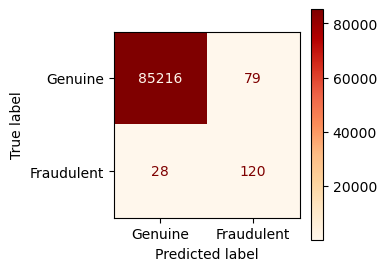

In [91]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, rf_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [92]:
# Compute the main metrics
rf_smote_recall = recall_score(y_test, rf_smote_pred)
rf_smote_precision = precision_score(y_test, rf_smote_pred)
rf_smote_f1 = f1_score(y_test, rf_smote_pred)
rf_smote_accuracy = accuracy_score(y_test, rf_smote_pred)

rf_smote_scores = pd.DataFrame(data=[(rf_smote_recall, rf_smote_precision, rf_smote_f1, rf_smote_accuracy)], 
                               columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'],
                               index=['Random Forest'])

rf_smote_scores.head()

,Recall,Precision,F1 Score,Accuracy
Random Forest,0.810811,0.603015,0.691643,0.998748


The Random Forest model shows an improvement in recall after applying SMOTE, indicating better performance in identifying positive instances. With a precision of 60.3%, the model strikes a moderate balance between minimising false positives and false negatives. 

SMOTE generally performed better than random under-sampling for Random Forest. While random under-sampling showed higher recall, it suffered from very low precision. SMOTE achieved a better balance between recall and precision, resulting in a higher F1 score.

<a id="31"></a>
## 8.2 Logistic Regression

In [93]:
# Create a pipeline with SMOTE and the model
lr_smote_pipeline = make_pipeline(SMOTE(sampling_strategy=0.5, random_state=42), LogisticRegression(max_iter=500))

In [94]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(lr_smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.92753623 0.89855072 0.92753623 0.91304348 0.85294118]
Average Cross Validation Recall Score: 0.903921568627451


In [97]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

lr_smote_grid = GridSearchCV(lr_smote_pipeline, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(lr_smote_grid.best_params_))
print('Best Recall Score: {}'.format(lr_smote_grid.best_score_))

Best Parameters: {'logisticregression__C': 0.001}
Best Recall Score: 0.9039641943734015


In [98]:
# Make predictions on the test set with the best found parameters
lr_smote_pred = lr_smote_grid.predict(X_test)

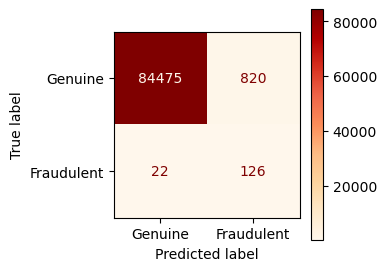

In [99]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, lr_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [100]:
# Compute the main metrics
lr_smote_recall = recall_score(y_test, lr_smote_pred)
lr_smote_precision = precision_score(y_test, lr_smote_pred)
lr_smote_f1 = f1_score(y_test, lr_smote_pred)
lr_smote_accuracy = accuracy_score(y_test, lr_smote_pred)

lr_smote_scores = pd.DataFrame(data=[(lr_smote_recall, lr_smote_precision, lr_smote_f1, lr_smote_accuracy)], 
                               columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'],
                               index=['Logistic Regression'])

lr_smote_scores.head()

,Recall,Precision,F1 Score,Accuracy
Logistic Regression,0.851351,0.133192,0.230347,0.990145


The recall of 85.1% indicates that the Logistic Regression model achieved better performance in capturing positive cases after applying SMOTE. However, the precision of 13.3% is relatively low, reflecting a trade-off between false positives and false negatives.

Comparing SMOTE and random under-sampling, SMOTE outperformed in the case of Logistic Regression. While random under-sampling achieved a higher recall, the precision was too low. SMOTE provided a better balance between recall and precision.

<a id="32"></a>
## 8.3 K-Nearest Neighbors

In [101]:
# Create a pipeline with SMOTE and the model
knn_smote_pipeline = make_pipeline(SMOTE(sampling_strategy=0.5, random_state=42), KNeighborsClassifier())

In [102]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(knn_smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.89855072 0.85507246 0.85507246 0.88405797 0.80882353]
Average Cross Validation Recall Score: 0.8603154305200341


In [103]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 10, 20, 30, 40]
}

knn_smote_grid = GridSearchCV(knn_smote_pipeline, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(knn_smote_grid.best_params_))
print('Best Recall Score: {}'.format(knn_smote_grid.best_score_))

Best Parameters: {'kneighborsclassifier__n_neighbors': 30}
Best Recall Score: 0.8835890878090366


In [104]:
# Make predictions on the test set with the best found parameters
knn_smote_pred = knn_smote_grid.predict(X_test)

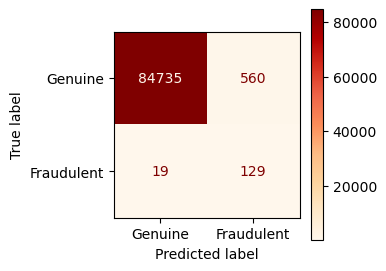

In [105]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, knn_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [106]:
# Compute the main metrics
knn_smote_recall = recall_score(y_test, knn_smote_pred)
knn_smote_precision = precision_score(y_test, knn_smote_pred)
knn_smote_f1 = f1_score(y_test, knn_smote_pred)
knn_smote_accuracy = accuracy_score(y_test, knn_smote_pred)

knn_smote_scores = pd.DataFrame(data=[(knn_smote_recall, knn_smote_precision, knn_smote_f1, knn_smote_accuracy)], 
                                columns=['Recall', 'Precision','F1 Score', 'Accuracy'],
                                index=['KNN'])

knn_smote_scores.head()

,Recall,Precision,F1 Score,Accuracy
KNN,0.871622,0.187228,0.308244,0.993224


After applying SMOTE, the KNN model is able to correctly identify 87.2% of the actual fraudulent transactions, indicating an improvement compared to the initial results without the resampling technique. However, similar to Logistic Regression model, the precision is relatively low after applying SMOTE.

In comparison to the random under-sampling technique, SMOTE performed better, achieving a superior balance between recall and precision.

<a id="33"></a>
## 8.4 Support Vector Machine

In [107]:
# Create a pipeline with SMOTE and the model
svm_smote_pipeline = make_pipeline(SMOTE(sampling_strategy=0.5, random_state=42), SVC())

In [108]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(svm_smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.89855072 0.85507246 0.85507246 0.88405797 0.85294118]
Average Cross Validation Recall Score: 0.8691389599317988


In [109]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}

svm_smote_grid = GridSearchCV(svm_smote_pipeline, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(svm_smote_grid.best_params_))
print('Best Recall Score: {}'.format(svm_smote_grid.best_score_))

Best Parameters: {'svc__C': 1, 'svc__gamma': 0.001}
Best Recall Score: 0.8952685421994886


In [110]:
# Make predictions on the test set with the best found parameters
svm_smote_pred = svm_smote_grid.predict(X_test)

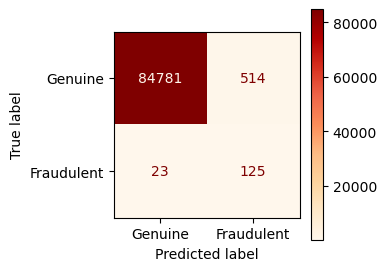

In [111]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, svm_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [112]:
# Compute the main metrics
svm_smote_recall = recall_score(y_test, svm_smote_pred)
svm_smote_precision = precision_score(y_test, svm_smote_pred)
svm_smote_f1 = f1_score(y_test, svm_smote_pred)
svm_smote_accuracy = accuracy_score(y_test, svm_smote_pred)

svm_smote_scores = pd.DataFrame(data=[(svm_smote_recall, svm_smote_precision, svm_smote_f1, svm_smote_accuracy)], 
                                columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'],
                                index=['SVM'])

svm_smote_scores.head()

,Recall,Precision,F1 Score,Accuracy
SVM,0.844595,0.195618,0.317662,0.993715


There is an improvement in the recall of the SVM model compared to its initial results without SMOTE. Similar to the Logistic Regression and KNN models, the precision of the SVM model is relatively low, standing at 19.6%.

SMOTE outperformed random under-sampling for the SVM model. Although random under-sampling achieved an extremely high recall, the model suffered from very low precision. SMOTE provided a more balanced combination of recall and precision.

<a id="34"></a>
## 8.5 Neural Networks Using TensorFlow

In [113]:
# Define over-sampling strategy and resample the dataset
sm = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print('No. of Genuine Transactions: {:,}'.format(y_train_smote.value_counts()[0]))
print('No. of Fraudulent Transactions: {:,}'.format(y_train_smote.value_counts()[1]))
print('Total No. of Transactions: {:,}'.format(len(y_train_smote)))

No. of Genuine Transactions: 199,020
No. of Fraudulent Transactions: 99,510
Total No. of Transactions: 298,530


In [127]:
# Set up the layers and compile the model
tf_model_smote = Sequential()

tf_model_smote.add(Dense(30, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(25, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(20, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(15, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(10, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(1, activation='sigmoid'))

tf_model_smote.compile(loss='binary_crossentropy', optimizer='adam')

In [128]:
# Fit the neural network model to the training set
tf_model_smote.fit(x=X_train_smote, y=y_train_smote, epochs=40, batch_size=250, validation_split=0.2)

Epoch 1/40
956/956 [==============================] - 3s 2ms/step - loss: 0.1212 - val_loss: 0.1392
Epoch 2/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0380 - val_loss: 0.0546
Epoch 3/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0248 - val_loss: 0.0288
Epoch 4/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0181 - val_loss: 0.0150
Epoch 5/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0147 - val_loss: 0.0087
Epoch 6/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0123 - val_loss: 0.0067
Epoch 7/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0114 - val_loss: 0.0103
Epoch 8/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0102 - val_loss: 0.0079
Epoch 9/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0096 - val_loss: 0.0044
Epoch 10/40
956/956 [==============================] - 2s 2ms/step - loss: 0.0098 - val_loss: 0.0060

Text(0, 0.5, 'Loss')

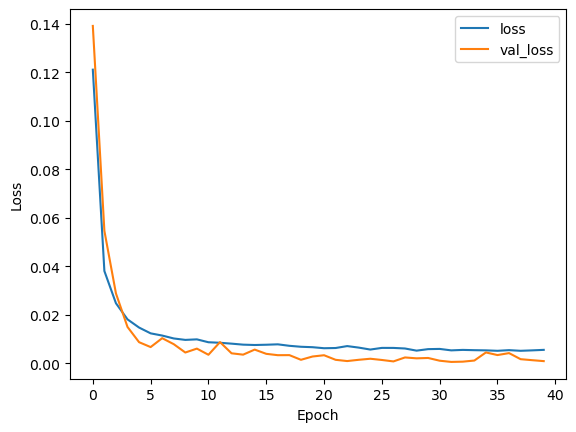

In [129]:
# Review training and validation loss
losses = pd.DataFrame(tf_model_smote.history.history) 
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [130]:
# Make predictions on the test set with the trained model
tf_smote_pred = (tf_model_smote.predict(X_test) > 0.5).astype("int32")

2671/2671 [==============================] - 2s 882us/step


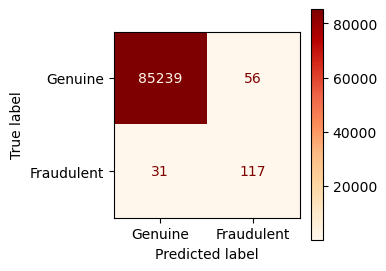

In [131]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, tf_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [132]:
# Compute the main metrics
tf_smote_recall = recall_score(y_test, tf_smote_pred)
tf_smote_precision = precision_score(y_test, tf_smote_pred)
tf_smote_f1 = f1_score(y_test, tf_smote_pred)
tf_smote_accuracy = accuracy_score(y_test, tf_smote_pred)

tf_smote_scores = pd.DataFrame(data=[(tf_smote_recall, tf_smote_precision, tf_smote_f1, tf_smote_accuracy)], 
                               columns=['Recall', 'Precision','F1 Score', 'Accuracy'],
                               index=['Neural Networks Using TensorFlow'])

tf_smote_scores.head()

,Recall,Precision,F1 Score,Accuracy
Neural Networks Using TensorFlow,0.790541,0.676301,0.728972,0.998982


SMOTE improved the recall for the neural network, with a slight decrease in precision. However, the precision of 67.6% is still relatively high compared to other models after SMOTE, indicating a better balance between false positives and false negatives.

Similarly, SMOTE provided a better balance between recall and precision for the neural network compared to random under-sampling.

<a id="35"></a>
## 8.6 Performance Comparison

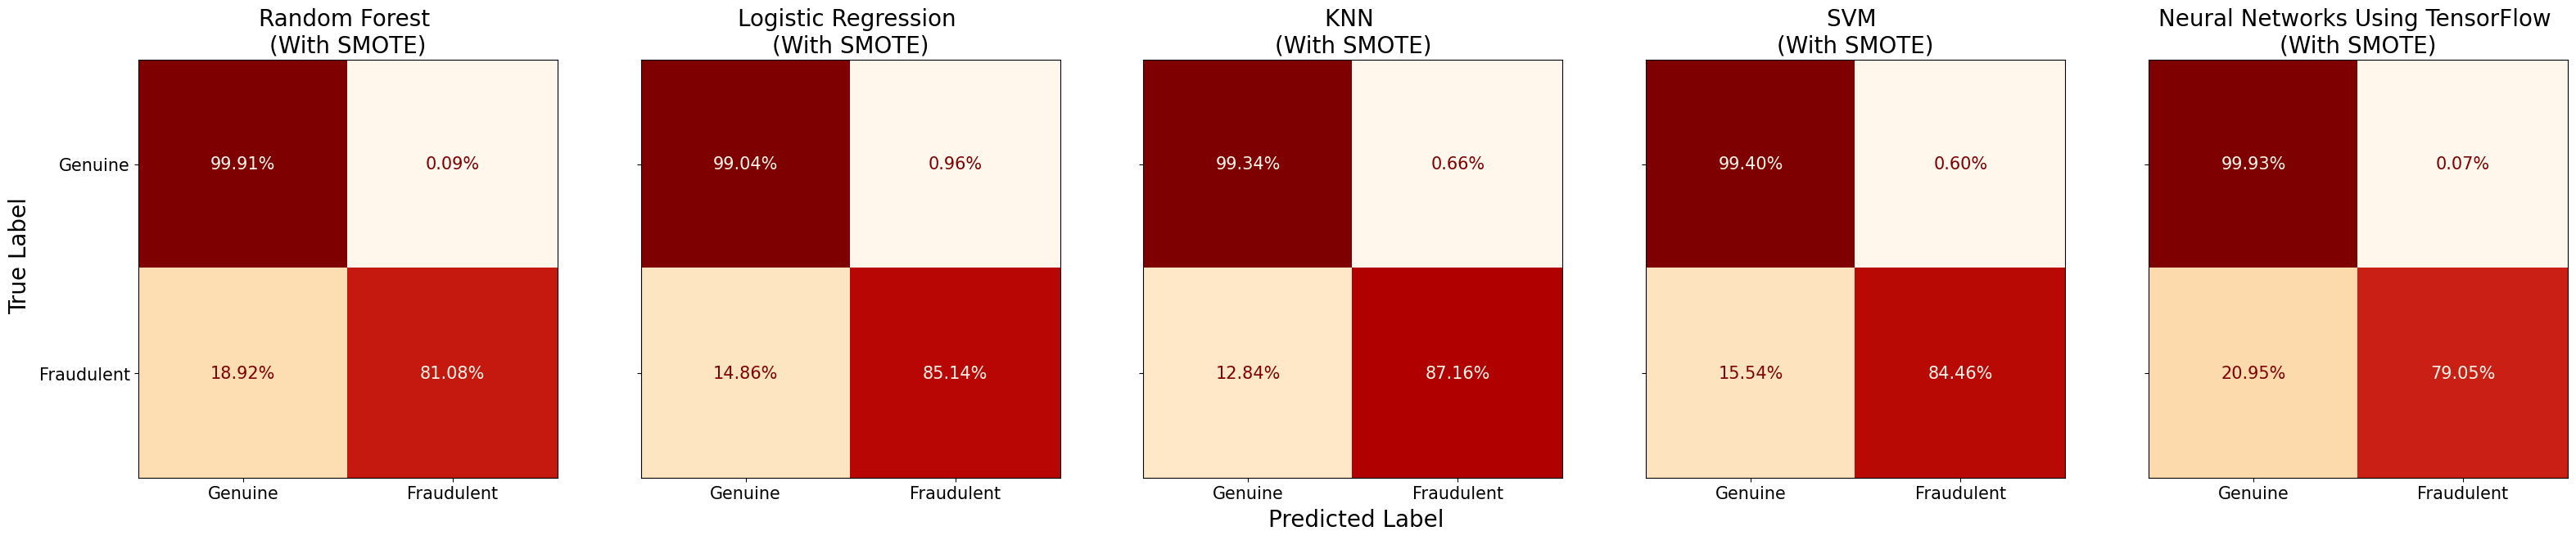

In [152]:
# Compare the confusion matrix
fig, axes = plt.subplots(1, 5, figsize=(32, 6), sharex=True, sharey=True)

smote_predictions_list = [rf_smote_pred, lr_smote_pred, knn_smote_pred, svm_smote_pred, tf_smote_pred]
models = ['Random Forest', 'Logistic Regression', 'KNN', 'SVM', 'Neural Networks Using TensorFlow']
techniques = ['With SMOTE'] * 5

axes = axes.flatten()

for i, predictions in enumerate(smote_predictions_list):
    ax = axes[i]  
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax, display_labels=display_labels, cmap='OrRd', colorbar=False, normalize='true', values_format='.2%', text_kw={"fontsize":15})
    
    title = f'{models[i]} \n({techniques[i]})'
    cm_display.ax_.set_title(f'{title}', fontsize=20)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].set_xticklabels(display_labels, fontsize=15)
    axes[i].set_yticklabels(display_labels, fontsize=15)
    
fig.text(0.52, -0.04, 'Predicted Label', ha='center', va='center', fontsize=20)
fig.text(0.01, 0.5, 'True Label', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout() 
plt.show() 

In [148]:
# Compare the metrics
prediction_smote = pd.concat([rf_smote_scores, lr_smote_scores, knn_smote_scores, svm_smote_scores, tf_smote_scores], ignore_index=False)

iterables = [['With SMOTE'], list(prediction_smote.index)]
index = pd.MultiIndex.from_product(iterables, names=['Technique', 'Model'])
prediction_smote = pd.DataFrame(prediction_smote.to_numpy(), index=index, columns=list(prediction_smote.columns.values))

prediction_smote.head()

Recall  Precision  F1 Score  \
Technique  Model                                                             
With SMOTE Random Forest                     0.810811   0.603015  0.691643   
           Logistic Regression               0.851351   0.133192  0.230347   
           KNN                               0.871622   0.187228  0.308244   
           SVM                               0.844595   0.195618  0.317662   
           Neural Networks Using TensorFlow  0.790541   0.676301  0.728972   

                                             Accuracy  
Technique  Model                                       
With SMOTE Random Forest                     0.998748  
           Logistic Regression               0.990145  
           KNN                               0.993224  
           SVM                               0.993715  
           Neural Networks Using TensorFlow  0.998982

After implementing SMOTE, it is evident that:

- There is a consistent improvement in recall across **all models** after applying SMOTE, indicating better identification of positive instances.
- However, this improvement in recall comes at the cost of precision, leading to an increased rate of false positives in **all models**.

Comparing to random under-sampling, it is evident that:
- Random under-sampling tended to achieve higher recall, but at the cost of significantly lower precision for **all models**.
- SMOTE generally outperformed random under-sampling for **all models** by providing a more balanced combination of recall and precision, resulting in higher F1 scores.

<a id="9"></a>
# 9. Summary

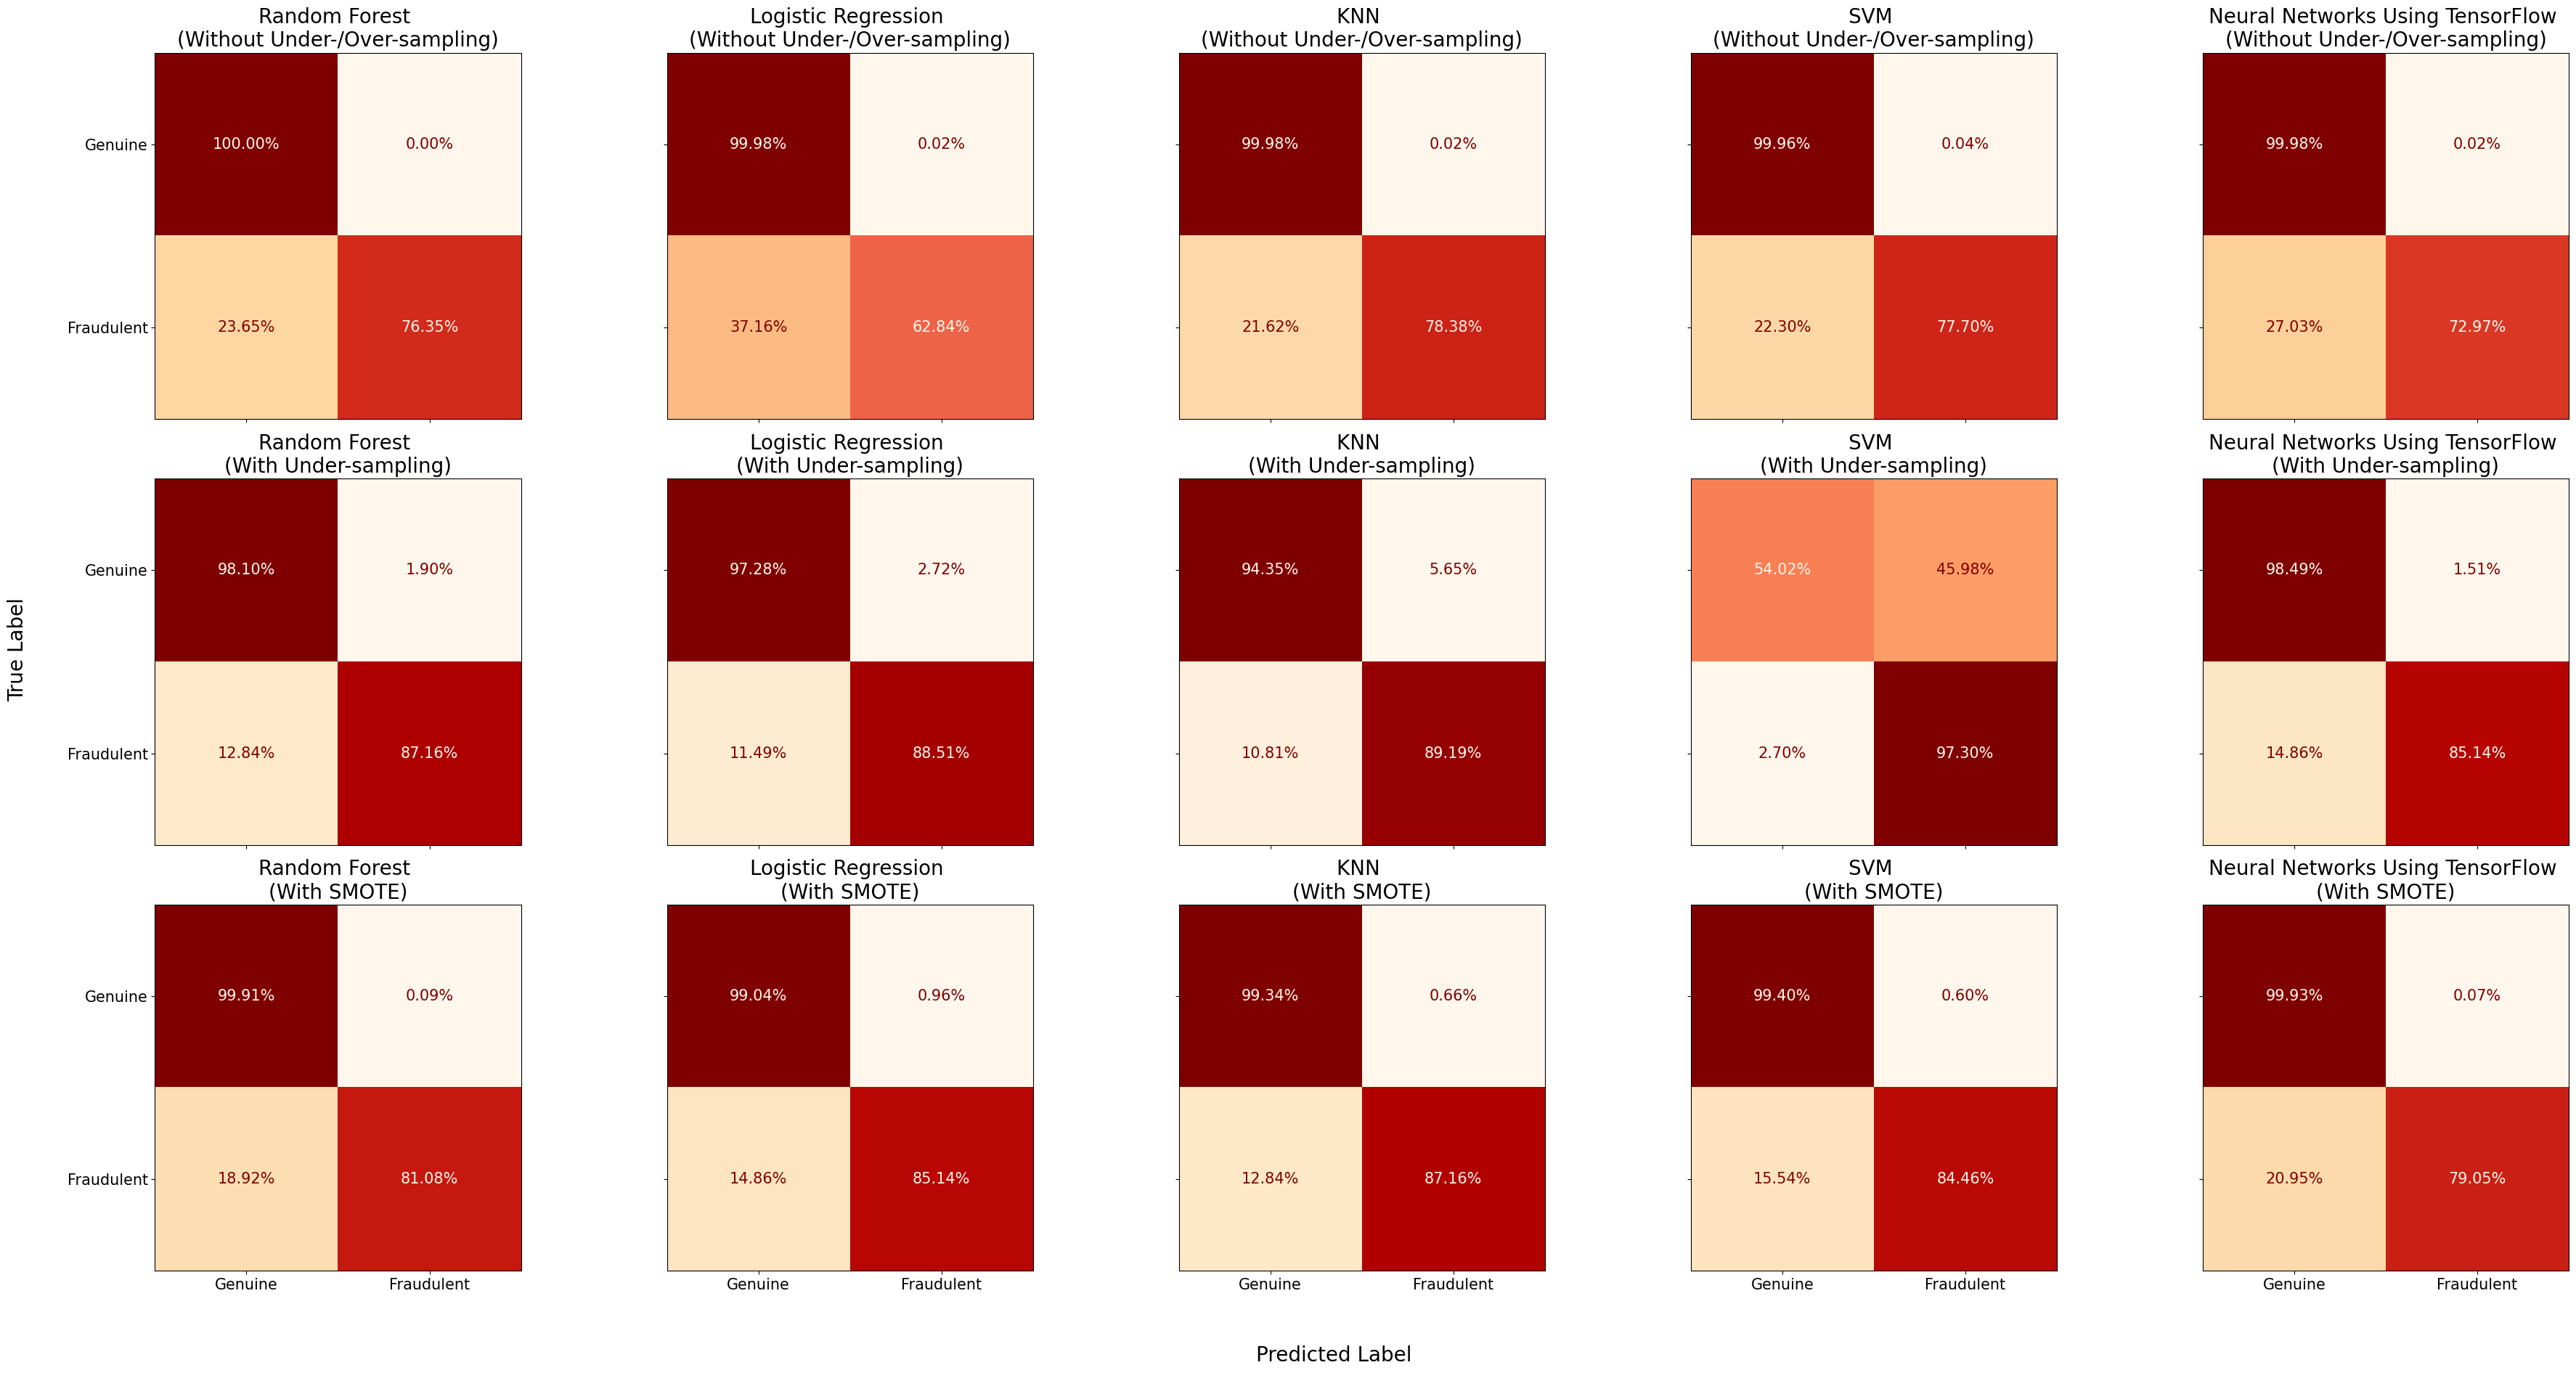

In [153]:
# Compare the confusion matrix
fig, axes = plt.subplots(3, 5, figsize=(37, 18), sharex=True, sharey=True)

predictions_summary_list = [rf_pred, lr_pred, knn_pred, svm_pred, tf_pred, rf_under_pred, lr_under_pred, knn_under_pred, svm_under_pred, tf_under_pred, rf_smote_pred, lr_smote_pred, knn_smote_pred, svm_smote_pred, tf_smote_pred]
models = ['Random Forest', 'Logistic Regression', 'KNN', 'SVM', 'Neural Networks Using TensorFlow'] * 3
techniques = ['Without Under-/Over-sampling'] * 5 + ['With Under-sampling'] * 5 + ['With SMOTE'] * 5

axes = axes.flatten()

for i, predictions in enumerate(predictions_summary_list):
    ax = axes[i]  
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax, display_labels=display_labels, cmap='OrRd', colorbar=False, normalize='true', values_format='.2%', text_kw={"fontsize":15})
    
    title = f'{models[i]} \n({techniques[i]})'
    cm_display.ax_.set_title(f'{title}', fontsize=20)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].set_xticklabels(display_labels, fontsize=15)
    axes[i].set_yticklabels(display_labels, fontsize=15)
    
fig.text(0.5, -0.04, 'Predicted Label', ha='center', va='center', fontsize=20)
fig.text(0.01, 0.5, 'True Label', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout() 
plt.show() 


In [154]:
# Compare the metrics
prediction_summary = pd.concat([prediction, prediction_under, prediction_smote], ignore_index=False)

prediction_summary.head(15)

Recall  \
Technique                    Model                                        
Without Under-/Over-sampling Random Forest                     0.763514   
                             Logistic Regression               0.628378   
                             KNN                               0.783784   
                             SVM                               0.777027   
                             Neural Networks Using TensorFlow  0.729730   
With Random Under-sampling   Random Forest                     0.871622   
                             Logistic Regression               0.885135   
                             KNN                               0.891892   
                             SVM                               0.972973   
                             Neural Networks Using TensorFlow  0.851351   
With SMOTE                   Random Forest                     0.810811   
                             Logistic Regression               0.851351   
                             KNN                               0.871622   
                             SVM                               0.844595   
                             Neural Networks Using TensorFlow  0.790541   

                                                               Precision  \
Technique                    Model                                         
Without Under-/Over-sampling Random Forest                      0.965812   
                             Logistic Regression                0.861111   
                             KNN                                0.899225   
                             SVM                                0.787671   
                             Neural Networks Using TensorFlow   0.837209   
With Random Under-sampling   Random Forest                      0.073756   
                             Logistic Regression                0.053491   
                             KNN                                0.026667   
                             SVM                                0.003658   
                             Neural Networks Using TensorFlow   0.088983   
With SMOTE                   Random Forest                      0.603015   
                             Logistic Regression                0.133192   
                             KNN                                0.187228   
                             SVM                                0.195618   
                             Neural Networks Using TensorFlow   0.676301   

                                                               F1 Score  \
Technique                    Model                                        
Without Under-/Over-sampling Random Forest                     0.852830   
                             Logistic Regression               0.726562   
                             KNN                               0.837545   
                             SVM                               0.782313   
                             Neural Networks Using TensorFlow  0.779783   
With Random Under-sampling   Random Forest                     0.136004   
                             Logistic Regression               0.100886   
                             KNN                               0.051785   
                             SVM                               0.007289   
                             Neural Networks Using TensorFlow  0.161125   
With SMOTE                   Random Forest                     0.691643   
                             Logistic Regression               0.230347   
                             KNN                               0.308244   
                             SVM                               0.317662   
                             Neural Networks Using TensorFlow  0.728972   

                                                               Accuracy  
Technique                    Model                                       
Without Under-/Over-sampling Random Forest                     0.999544 

Comparing the results of the models before applying resampling techniques, after applying random under-sampling, and after applying SMOTE, it is evident that:

-  The models had varying levels of precision and recall **before resampling**.
-  **Random under-sampling** increased recall but at the cost of precision for most models.
-  **SMOTE** provided a more balanced improvement, with a trade-off between recall and precision.


In conclusion, **SMOTE** generally outperformed **random under-sampling** by providing a more balanced improvement in both recall and precision for these models. Ultimately, the choice of the best model and resampling techniques depends on the business goal, such as the importance of precision versus recall, as well as considerations like computational efficiency. In this classification scenario, our objective is to identify fraudulent credit card transactions to ensure customers are not charged for items they did not purchase. While recognising fraudulent transactions is crucial, avoiding misclassification of transactions as fraud is also important to prevent unnecessary investigations or actions. For instance, if customers regularly make purchases with their credit cards and the model incorrectly classifies these transactions as fraud, it could lead to increased customer complaints and dissatisfaction.

Therefore, balancing recall and precision is crucial in this classification scenario. The F1 score, which balances precision and recall, can be a useful metric. Given the importance of both recall and precision, models that provide a higher F1 score after **SMOTE** can be preferable, as models after **SMOTE** generally offer a better balance between recall and precision compared to **random under-sampling**. Notable examples include **Random Forest** and **neural networks using TensorFlow**. Determining the best model ultimately depends on specific business requirements, such as the overall objectives of the fraud detection system.